# **Project I**

###### - Team Members: Karen Lin, Kevin Zhang, Sunjae Youm </br> - 6/17/2024 </br> - Data Source: https://catalog.data.gov/dataset/crash-reporting-drivers-data/resource/9851a37f-4f32-464e-8ba6-c23023653a7f

### **Abstract**
Our data team assumed that we received a request from the Montgomery County local government in Maryland. The purpose of the request was to determine how to use the county budget to improve traffic and reduce car accidents. Additionally, Montgomery County wanted to choose a specific municipality and asked us, as data analysts, to identify which roads had the most car accidents. To achieve this, we investigated traffic accident records from January 2015 to March 2024, analyzing the areas with the highest accident rates, the time periods with the most accidents, and whether there were traffic control regulations in place at the accident locations.

In [3]:
# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the car_crash_drivers_report
car_crash_df = pd.read_csv("./Resources/Crash_Reporting_-_Drivers_Data.csv")
car_crash_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [6]:
# show what columns the dataframe has
car_crash_df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
# Check the total number of Municipality records
car_crash_df["Report Number"].count()

172105

In [8]:
# Remove rows where Municipality is "N/A"
car_crash_df = car_crash_df[car_crash_df["Municipality"] != "N/A"]

# Remove rows where Municipality is NaN
car_crash_df = car_crash_df.dropna(subset=["Municipality"])

# Check data cleaning process has been properly applied
car_crash_df["Report Number"].count()

19126

In [9]:
# define the columns/variables for the analysis
selected_columns = ["Report Number", "Crash Date/Time", "Route Type", "Collision Type", "Municipality","Weather","Surface Condition", "Traffic Control","Speed Limit","Latitude","Longitude", "Road Name", "Cross-Street Name"]

In [10]:
# recreate the dataframe 
reduced_car_crash_df = car_crash_df[selected_columns]
reduced_car_crash_df.head()

,Report Number,Crash Date/Time,Route Type,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Road Name,Cross-Street Name
41,EJ78850036,07/20/2023 02:48:00 PM,Municipality,STRAIGHT MOVEMENT ANGLE,GAITHERSBURG,CLEAR,DRY,STOP SIGN,30,39.141990,-77.224371,FIRSTFIELD RD,QUINCE ORCHARD BLVD
50,MCP3161005H,07/27/2023 04:14:00 PM,Maryland (State),SAME DIR REAR END,CHEVY CHASE #4,CLEAR,DRY,NO CONTROLS,25,38.977186,-77.088324,BRADLEY LA,WEST AVE
51,DM8476004Z,07/22/2023 05:10:00 PM,Maryland (State),SAME DIRECTION RIGHT TURN,TAKOMA PARK,CLEAR,DRY,NaN,35,38.985947,-76.988159,NEW HAMPSHIRE AVE,HOLTON LA
52,EJ78940034,07/15/2023 10:47:00 AM,Municipality,SAME DIR REAR END,GAITHERSBURG,CLEAR,DRY,NO CONTROLS,25,39.133463,-77.203386,W DEER PARK RD,CEDAR AVE
62,DD56700006,07/22/2023 04:07:00 AM,Maryland (State),STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,ROCKVILLE PIKE,W EDMONSTON DR


In [11]:
# Group by Municipality and plot the pie chart
row_counts = reduced_car_crash_df.groupby("Municipality").size().reset_index(name='Row_Count')
row_counts = row_counts.sort_values(by='Row_Count', ascending=False).reset_index(drop=True)
municipality_df = pd.DataFrame(row_counts)
municipality_df

,Municipality,Row_Count
0,ROCKVILLE,9320
1,GAITHERSBURG,6437
2,TAKOMA PARK,1685
3,KENSINGTON,413
4,CHEVY CHASE #4,325
5,CHEVY CHASE #3,156
6,FRIENDSHIP HEIGHTS,133
7,POOLESVILLE,108
8,CHEVY CHASE VIEW,93
9,CHEVY CHASE VILLAGE,87


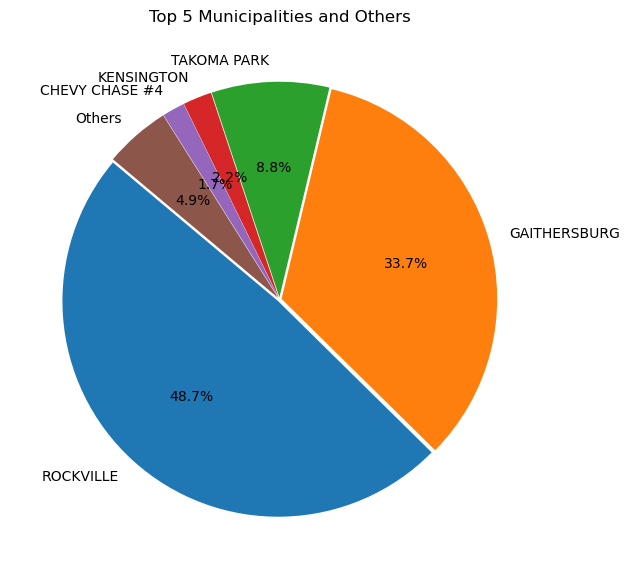

In [12]:
# Plot Pie Chart
# Calculate the top 5 and the sum of the rest
top_5 = row_counts.head(5)
others_count = row_counts.iloc[5:]['Row_Count'].sum()

# Create a DataFrame for "Others"
others = pd.DataFrame({'Municipality': ['Others'], 'Row_Count': [others_count]})

# Concatenate the top 5 with the "Others" row
top_5 = pd.concat([top_5, others], ignore_index=True)

# Plotting
labels = top_5["Municipality"]
sizes = top_5["Row_Count"]
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] # Explode the top 5 and the 'Others'

plt.figure(figsize=(10, 7))
plt.pie(sizes, autopct="%1.1f%%", labels=labels, explode=explode, startangle=140)
plt.title('Top 5 Municipalities and Others')
plt.show()

In [13]:
reduced_car_crash_df

,Report Number,Crash Date/Time,Route Type,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Road Name,Cross-Street Name
41,EJ78850036,07/20/2023 02:48:00 PM,Municipality,STRAIGHT MOVEMENT ANGLE,GAITHERSBURG,CLEAR,DRY,STOP SIGN,30,39.141990,-77.224371,FIRSTFIELD RD,QUINCE ORCHARD BLVD
50,MCP3161005H,07/27/2023 04:14:00 PM,Maryland (State),SAME DIR REAR END,CHEVY CHASE #4,CLEAR,DRY,NO CONTROLS,25,38.977186,-77.088324,BRADLEY LA,WEST AVE
51,DM8476004Z,07/22/2023 05:10:00 PM,Maryland (State),SAME DIRECTION RIGHT TURN,TAKOMA PARK,CLEAR,DRY,NaN,35,38.985947,-76.988159,NEW HAMPSHIRE AVE,HOLTON LA
52,EJ78940034,07/15/2023 10:47:00 AM,Municipality,SAME DIR REAR END,GAITHERSBURG,CLEAR,DRY,NO CONTROLS,25,39.133463,-77.203386,W DEER PARK RD,CEDAR AVE
62,DD56700006,07/22/2023 04:07:00 AM,Maryland (State),STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,ROCKVILLE PIKE,W EDMONSTON DR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172088,DD5508002B,09/12/2016 06:08:00 PM,Municipality,SAME DIR REAR END,ROCKVILLE,CLEAR,DRY,NaN,25,39.085408,-77.144982,S STONESTREET AVE,READING TERR
172091,DD5649002Q,11/11/2022 02:40:00 AM,Municipality,SINGLE VEHICLE,ROCKVILLE,CLEAR,DRY,NO CONTROLS,25,39.074504,-77.111280,TWINBROOK PKWY,MCAULIFFE DR
172099,DD56230016,03/25/2018 02:10:00 PM,Municipality,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,STOP SIGN,25,39.077970,-77.122989,BROADWOOD DR,GRANDIN AVE
172100,DM8338000C,03/01/2016 10:01:00 AM,Municipality,OTHER,TAKOMA PARK,CLEAR,DRY,NaN,25,38.972560,-76.997466,NEW HAMPSHIRE SERVICE LA,PRINCE GEORGES AVE


In [14]:
# break the crash date/time column to date and military time (new_column_name date & car_accident_time) => later, if necessary, we need to break it by "year"
# Split the "Crash Date/Time" column into separate date and time columns
reduced_car_crash_df = reduced_car_crash_df.copy(deep=True)
reduced_car_crash_df[['Date', 'Time']] = reduced_car_crash_df['Crash Date/Time'].str.split(' ', expand=True, n=1)

# Convert the time to military format
reduced_car_crash_df['Time'] = pd.to_datetime(reduced_car_crash_df['Time'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

# Drop the original "Crash Date/Time" and "Time" columns if needed
reduced_car_crash_df.drop(columns=['Crash Date/Time'], inplace=True)

reduced_car_crash_df['Date'] = pd.to_datetime(reduced_car_crash_df['Date'], format='%m/%d/%Y')
reduced_car_crash_df['Year'] = reduced_car_crash_df['Date'].dt.year
reduced_car_crash_df['Month'] = reduced_car_crash_df['Date'].dt.month
reduced_car_crash_df['Day'] = reduced_car_crash_df['Date'].dt.day

reduced_car_crash_df

,Report Number,Route Type,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Road Name,Cross-Street Name,Date,Time,Year,Month,Day
41,EJ78850036,Municipality,STRAIGHT MOVEMENT ANGLE,GAITHERSBURG,CLEAR,DRY,STOP SIGN,30,39.141990,-77.224371,FIRSTFIELD RD,QUINCE ORCHARD BLVD,2023-07-20,14:48:00,2023,7,20
50,MCP3161005H,Maryland (State),SAME DIR REAR END,CHEVY CHASE #4,CLEAR,DRY,NO CONTROLS,25,38.977186,-77.088324,BRADLEY LA,WEST AVE,2023-07-27,16:14:00,2023,7,27
51,DM8476004Z,Maryland (State),SAME DIRECTION RIGHT TURN,TAKOMA PARK,CLEAR,DRY,NaN,35,38.985947,-76.988159,NEW HAMPSHIRE AVE,HOLTON LA,2023-07-22,17:10:00,2023,7,22
52,EJ78940034,Municipality,SAME DIR REAR END,GAITHERSBURG,CLEAR,DRY,NO CONTROLS,25,39.133463,-77.203386,W DEER PARK RD,CEDAR AVE,2023-07-15,10:47:00,2023,7,15
62,DD56700006,Maryland (State),STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,ROCKVILLE PIKE,W EDMONSTON DR,2023-07-22,04:07:00,2023,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172088,DD5508002B,Municipality,SAME DIR REAR END,ROCKVILLE,CLEAR,DRY,NaN,25,39.085408,-77.144982,S STONESTREET AVE,READING TERR,2016-09-12,18:08:00,2016,9,12
172091,DD5649002Q,Municipality,SINGLE VEHICLE,ROCKVILLE,CLEAR,DRY,NO CONTROLS,25,39.074504,-77.111280,TWINBROOK PKWY,MCAULIFFE DR,2022-11-11,02:40:00,2022,11,11
172099,DD56230016,Municipality,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,STOP SIGN,25,39.077970,-77.122989,BROADWOOD DR,GRANDIN AVE,2018-03-25,14:10:00,2018,3,25
172100,DM8338000C,Municipality,OTHER,TAKOMA PARK,CLEAR,DRY,NaN,25,38.972560,-76.997466,NEW HAMPSHIRE SERVICE LA,PRINCE GEORGES AVE,2016-03-01,10:01:00,2016,3,1


In [85]:
times = reduced_car_crash_df["Time"].unique()
times.sort()
times

array(['00:00:00', '00:01:00', '00:02:00', ..., '23:57:00', '23:58:00',
       '23:59:00'], dtype=object)

In [15]:
# reduced_car_crash_df in order of most car accidents to see trends for each year (must have 5 lines in one line chart)
# decide which municipality has the most car accident increase in the past 3 years
years = reduced_car_crash_df["Year"].unique()
years.sort()
Rockville = reduced_car_crash_df.loc[reduced_car_crash_df["Municipality"] == "ROCKVILLE"]
groups = reduced_car_crash_df.groupby(by = ["Municipality", "Year"])
groups_counts = groups.count()
indices = groups_counts.index 

#Rockville_2015_number = len(Rockville.loc[Rockville["Year"] == 2015])
#Rockville_2016_number = len(Rockville.loc[Rockville["Year"] == 2016])
#Rockville_2017_number = len(Rockville.loc[Rockville["Year"] == 2017])
#reduced_car_crash_df.loc[reduced_car_crash["Municipality"] == "ROCKVILLE"]["Year"].count()
## Try to just plot the data for ROCKVILLE
#plt.plot(years, 

In [16]:
# with the chosen Municipality, we can identify what road has the most accident
reduced_car_crash_df.loc[reduced_car_crash_df["Municipality"] == "ROCKVILLE"]["Road Name"].value_counts()
# Indeed, these numbers confirm what we saw on the map that most accidents in Rockville happened on the road, Rockville Pike

Road Name
ROCKVILLE PIKE      1280
HUNGERFORD DR        764
VEIRS MILL RD        707
W MONTGOMERY AVE     538
FREDERICK RD         529
                    ... 
BEALL AVE              1
WOODLAND RD            1
ORCHARD WAY S          1
SADDLE RIDGE CIR       1
NIMITZ AVE             1
Name: count, Length: 284, dtype: int64

In [55]:
######### Time with most accidents (overall) ##########
reduced_car_crash_df.loc[reduced_car_crash_df["Municipality"] == "ROCKVILLE"]["Time"].value_counts()
## It looks like the most common times for car crashes are when people get off work (5 pm, 5:30 pm, 6 pm, 7 pm) and when people 
## are on their way to work (8 am)
### FINISH: Compare times with most accidents across years
Rockville = reduced_car_crash_df.loc[reduced_car_crash_df["Municipality"] == "ROCKVILLE"]
Rockville_year_time = Rockville.groupby(by=["Year", "Time"]).count()

In [56]:
Rockville_year_time

Report Number  Route Type  Collision Type  Municipality  \
Year Time                                                                
2015 00:00:00              5           5               5             5   
     00:10:00              1           1               1             1   
     00:15:00              1           1               1             1   
     00:38:00              1           1               1             1   
     00:40:00              1           1               1             1   
...                      ...         ...             ...           ...   
2023 23:41:00              2           2               2             2   
     23:42:00              1           1               1             1   
     23:45:00              1           1               1             1   
     23:50:00              1           1               1             1   
     23:52:00              1           1               1             1   

               Weather  Surface Condition  Traffic Control  Speed Limit  \
Year Time                                                                 
2015 00:00:00        5                  5                5            5   
     00:10:00        1                  1                0            1   
     00:15:00        1                  1                0            1   
     00:38:00        1                  0                0            1   
     00:40:00        1                  1                0            1   
...                ...                ...              ...          ...   
2023 23:41:00        2                  2                2            2   
     23:42:00        1                  1                1            1   
     23:45:00        1                  1                0            1   
     23:50:00        1                  1                1            1   
     23:52:00        0                  1                1            1   

               Latitude  Longitude  Road Name  Cross-Street Name  Date  Month  \
Year Time                                                                       
2015 00:00:00         5          5          5                  5     5      5   
     00:10:00         1          1          1                  1     1      1   
     00:15:00         1          1          1                  1     1      1   
     00:38:00         1          1          1                  1     1      1   
     00:40:00         1          1          1                  1     1      1   
...                 ...        ...        ...                ...   ...    ...   
2023 23:41:00         2          2          2                  2     2      2   
     23:42:00         1          1          1                  1     1      1   
     23:45:00         1          1          1                  1     1      1   
     23:50:00         1          1          1                  1     1      1   
     23:52:00         1          1          1                  1     1      1   

               Day  
Year Time           
2015 00:00:00    5  
     00:10:00    1  
     00:15:00    1  
     00:38:00    1  
     00:40:00    1  
...            ...  
2023 23:41:00    2  
     23:42:00    1  
     23:45:00    1  
     23:50:00    1  
     23:52:00    1  

[3633 rows x 15 columns]

In [77]:
### Look for null values under Report Number for the above
len(Rockville_year_time["Report Number"].isna() == True)

3633

In [79]:
#### Get all the unique years
indices = Rockville_year_time.index
## Documentation from https://pandas.pydata.org/docs/user_guide/advanced.html
level_1_indices = indices.get_level_values(0).unique()
level_1_indices

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='Year')

In [117]:
### Just for me to test out how to access the data for a year
len(Rockville_year_time.loc[2015].index.unique())


463

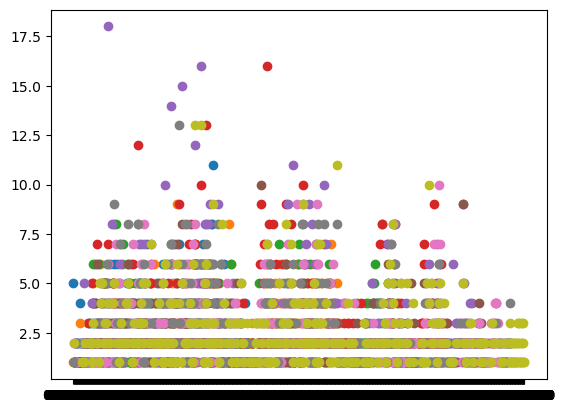

In [119]:
## Line graph with time as x-axis and number of car accidents as y-axis
## Each line represents a year
for level in level_1_indices: ## Iterate through the years
    ## Get number of car accidents by accessing 'Report Number' column 
    times = Rockville_year_time.loc[level].index
    numbers = Rockville_year_time.loc[level]["Report Number"]
    plt.scatter(times, numbers)


In [ ]:
# map plot to search where the most car accident happened (with the chosen Municipality)
map_plot_1 = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Municipality"
)
map_plot_1

In [ ]:
# Visually look at where there are the most car accidents on the map plot